# YOUTUBE ADVIEW PREDICTION

## TRAIN DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# Importing data
path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv(path + "train.csv")

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,9/14/2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,10/1/2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,7/2/2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,7/27/2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,6/29/2016,PT31S,D


In [4]:
data_train.shape

(14999, 9)

In [5]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)

In [6]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,9/14/2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,10/1/2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,7/2/2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,7/27/2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,6/29/2016,PT31S,4


In [7]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [8]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,9/14/2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,10/1/2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,7/2/2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,7/27/2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,6/29/2016,PT31S,4


In [9]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [10]:
column_vidid=data_train['vidid']

In [11]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [12]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2235,2925,6
1,2741,2,1707,56,2,6,207,3040,4
2,8138,1,2023,25,0,2,1905,1863,3
3,9005,6,620860,777,161,153,1952,2546,8
4,122,1,666,1,0,0,1783,1963,4


In [13]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2235,457,6
1,2741,2,1707,56,2,6,207,570,4
2,8138,1,2023,25,0,2,1905,136,3
3,9005,6,620860,777,161,153,1952,262,8
4,122,1,666,1,0,0,1783,31,4


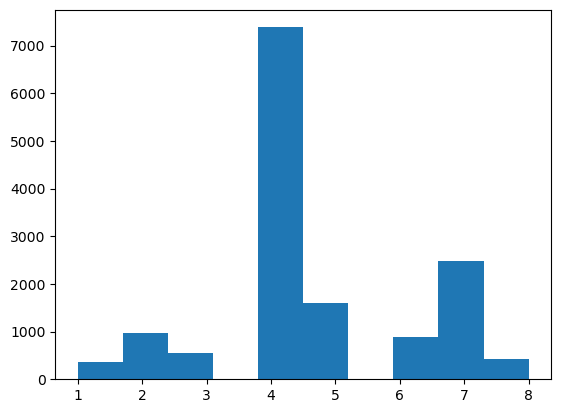

In [14]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()

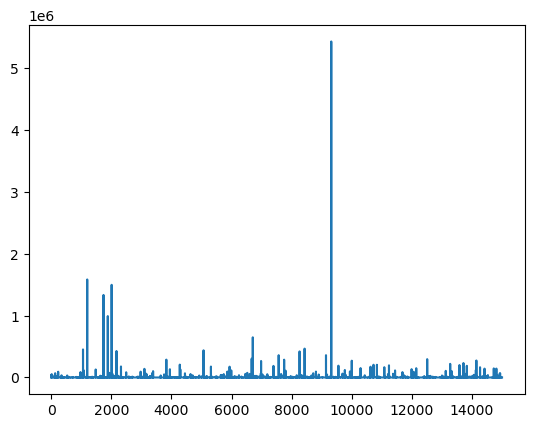

In [15]:
plt.plot(data_train["adview"])
plt.show()

In [16]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

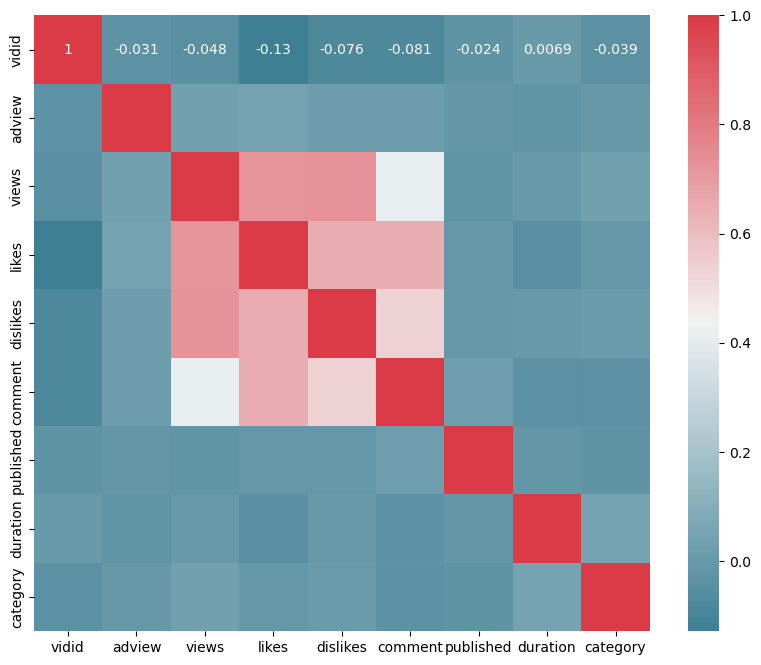

In [17]:
# Heatmap
import seaborn as sns

# Assuming data_train is your DataFrame
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()

# Replace np.bool with bool
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()


In [18]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)

In [19]:
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2235,457,6
1,1707,56,2,6,207,570,4
2,2023,25,0,2,1905,136,3
3,620860,777,161,153,1952,262,8
4,666,1,0,0,1783,31,4


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [21]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [22]:
X_train.mean()

0.15960396279171798

In [23]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [24]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3487.7083352341356
Mean Squared Error: 838380209.5536872
Root Mean Squared Error: 28954.795968089416


In [25]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 3821.714480874317
Mean Squared Error: 2129419000.6919398
Root Mean Squared Error: 46145.62818612333


In [26]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\shado\AppData\Local\Temp\ipykernel_11484\3502534829.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3354.349737122883
Mean Squared Error: 878139737.6681175
Root Mean Squared Error: 29633.42264518423


In [27]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)



Epoch 1/100


366/366 [==============================] - 7s 3ms/step - loss: 767406464.0000 - mean_squared_error: 767406464.0000
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 767403072.0000 - mean_squared_error: 767403072.0000
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 767396672.0000 - mean_squared_error: 767396672.0000
Epoch 4/100
366/366 [==============================] - 1s 3ms/step - loss: 767384704.0000 - mean_squared_error: 767384704.0000
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 767366784.0000 - mean_squared_error: 767366784.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767344448.0000 - mean_squared_error: 767344448.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767315264.0000 - mean_squared_error: 767315264.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767280448.0000 - mean_squared_er

In [28]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\shado\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3487.7083352341356
Mean Squared Error: 838380209.5536872
Root Mean Squared Error: 28954.795968089416


In [29]:
# Saving Scikit-learn model (Decision Tree)
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [30]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

C:\Users\shado\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
